# 生存分析の理論

生存分析には色々な関数が出てきて、ともすると混乱しやすい。  
ここでは、生存分析を主に理論的な立場から俯瞰する。

## 生存分析における各種関数

生存分析では、以下の5つの関数が登場する。
1. 生存期間$t$の確率密度関数(Probability Density Function): $f(t)$
2. $f(t)$の累積分布関数(Cumulative Distribution Function): $F(t)$
3. 生存関数: $S(t)$
4. ハザード関数: $h(t)$
5. 累積ハザード関数: $H(t)$

### 確率密度関数 $f(t)$

生存期間が$t$である確率密度を示す。確率密度なので、確率ではないのだが、ざっくりイメージを言えば、生存期間が$t$であるような確率のような何かである。実際に確率を計算するには、計算したい範囲(例: 1.5ヶ月~3ヶ月)について、確率密度$f(t)$の積分を行う必要がある。  
確率密度なので、1を超えることがある点に注意。  
英語だとProbability Density Function。

### 累積分布関数 $F(t)$

確率密度関数$f(t)$を0から$t$まで積分したもの。これは、0からtまでに死ぬ確率を表している。  
数式で書くと、
$$F(t) = \int_0^tf(x)dx$$
確率密度関数を0からある値$t$($x$のときもあるが、意味は同じ)まで積分したものが**累積分布関数(Cumulative Distribution Function)**であり、単に**分布関数(Distribution Function)**と呼ばれることもある。

上の式から、
$$f(t) = \frac{d}{dt}F(t)$$
である。

### 生存関数 S(t)

1から累積分布関数$F(t)$を引いたもの。これは、0からtまでに死なない確率、すなわち0からtまで生き残る確率を表している。  
数式で書くと、
$$S(t) = 1 - F(t)$$

上の関係から、
$$f(t) = - \frac{d}{dt}S(t)$$
が成り立つ。よって、生存関数の傾きは、$-f(t)$に等しい。

### ハザード関数 $h(t)$

ある瞬間$t$まで生き残ったのち、次の瞬間に死ぬ確率密度。ハザードレートとも呼ばれる。  
例えば、90歳の誕生日まで生き残って、次の瞬間に死ぬ確率密度は$h(90)$と書けるだろう。  
これは確率密度なので、1を超えることがある点に注意。(では$h(t)$を積分すれば死亡確率になるかというと、ごく短期間の積分であれば近似的にそうなるが、正確にはそうではないのでややこしい...。あくまでハザード関数は「ある瞬間$t$まで生き残ったのち、次の瞬間に死ぬ確率密度」とだけ捉えておくと良い。)  
ハザード関数を数式で書くと、
$\begin{eqnarray}
h(t) &=& \lim_{\delta t \to 0} \left\{\frac{P(t \leq T < t + \delta t | T \geq t)}{\delta t} \right\} \\
&=& \lim_{\delta t \to 0} \left\{\frac{P(t \leq T < t + \delta t)}{P(T \geq t)} \frac{1}{\delta t} \right\}
\end{eqnarray}$

つまり、生存期間を$T$として、「$T$が期間$t$よりは長かったが(=$t$以上生き残っていたが)、$t+\delta t$よりは短い($t+\delta t$までには死ぬ)確率」$P(t \leq T < t + \delta t)$を計算した後、「$t$以上生き残る確率」$P(T \geq t)$で割って条件付き確率に直し、更に期間$\delta t$で割って瞬間の確率に直している。

ハザード関数は更に次のように変形できる。
$\begin{eqnarray}
h(t) &=& \lim_{\delta t \to 0} \left\{\frac{P(t \leq T < t + \delta t)}{P(T \geq t)} \frac{1}{\delta t} \right\} \\
&=& \lim_{\delta t \to 0} \left\{\frac{F(t + \delta t) - F(t)}{S(t)} \frac{1}{\delta t} \right\} \\
&=& \frac{dF(t)}{dt} \frac{1}{S(t)} \\
&=& \frac{f(t)}{S(t)} 
\end{eqnarray}$

よって、
$$S(t)h(t) = f(t)$$

これは、「左辺: $t$まで生き残り、その次の瞬間(=$t$)に死ぬ確率」は「右辺: 期間$t$で死ぬ確率」に等しいという、ある意味当たり前のことを言っている式である。

また、ハザード関数は次のようにも書ける。
$\begin{eqnarray}
h(t) &=& \frac{dF(t)}{dt} \frac{1}{S(t)} \\
&=& \frac{dF(t)}{dt} \frac{1}{1-F(t)} \\
&=& - \frac{d}{dt} \ln \left( 1-F(t) \right) \\
&=& - \frac{d}{dt} \ln S(t) 
\end{eqnarray}$

すなわち、ハザード関数は、生存関数$S$の対数を時間$t$に対してプロットしたときの、減少方向の傾き(=減るスピード)である。

逆に、$S(t)$については、
$\begin{eqnarray} 
S(t) &=& \exp \left( - \int_0^t h(x)dx \right)\\
&=& \exp \left( - H(t)\right)
\end{eqnarray}$

ここで、$H(t)$は下で述べる累積ハザード関数である。

### 累積ハザード関数

ハザード関数$h(t)$を0から$t$まで積分したもの。これは、0からtまでに死ぬ
数式で書くと、
$$H(t) = \int_0^t h(x)dx$$

先程の式を代入すると、
$\begin{eqnarray}
H(t) &=& \int_0^t h(x)dx \\
&=& \int_0^t - \frac{d}{dx} \ln S(x) dx \\
&=& - \ln S(t) 
\end{eqnarray}
$

### 各関数の関係

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [11]:
t = np.linspace(0,30,1000)
m = 0.5
lam = 10
f = m * t**(m-1) / lam**m * np.exp(- (t/lam)**m)
F = 1 - np.exp(- (t/lam)**m)
S = np.exp(- (t/lam)**m)
h = 1 / lam**m * m * t**(m-1)
H = (t/lam)**m

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


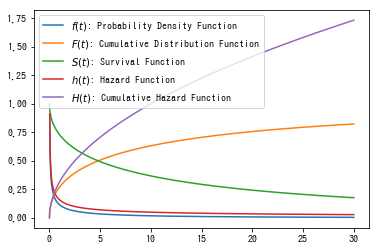

In [12]:
plt.plot(t, f, label="$f(t)$: Probability Density Function")
plt.plot(t, F, label="$F(t)$: Cumulative Distribution Function")
plt.plot(t, S, label="$S(t)$: Survival Function")
plt.plot(t, h, label="$h(t)$: Hazard Function")
plt.plot(t, H, label="$H(t)$: Cumulative Hazard Function")
plt.legend()

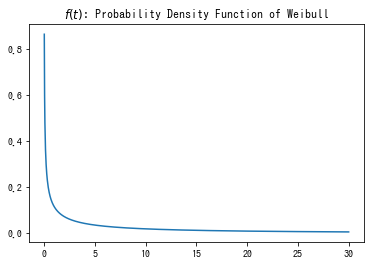

In [13]:
plt.plot(t, f)
plt.title("$f(t)$: Probability Density Function of Weibull");

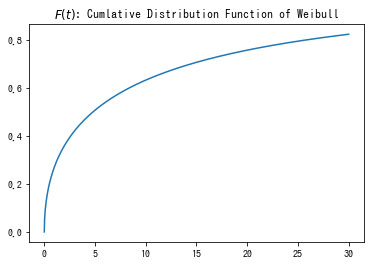

In [14]:
plt.plot(t, F)
plt.title("$F(t)$: Cumlative Distribution Function of Weibull");

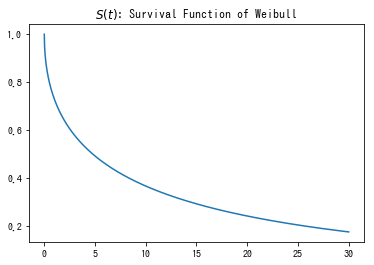

In [15]:
plt.plot(t, S)
plt.title("$S(t)$: Survival Function of Weibull");

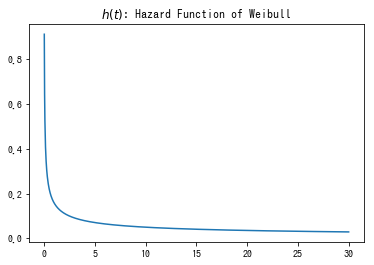

In [16]:
plt.plot(t, h)
plt.title("$h(t)$: Hazard Function of Weibull");

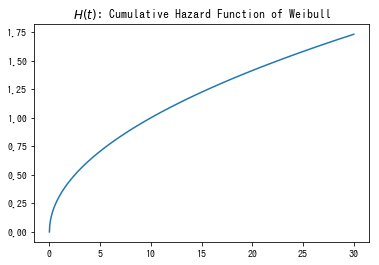

In [17]:
plt.plot(t, H)
plt.title("$H(t)$: Cumulative Hazard Function of Weibull");

## 各モデルにおける関数

### 外生変数なし

#### ワイブル分布モデル

- 確率密度関数 $$f(t) = m \frac {t^{m-1}}{\lambda^{m}} \exp \left(-\frac {t^m}{\lambda ^m}\right)$$
- 累積分布関数 $$F(t) = 1 - \exp \left(-\frac{t^m}{\lambda^m} \right)$$
- 生存関数 $$S(t) = \exp \left(-\frac{t^m}{\lambda^m} \right)$$
- ハザード関数 $$h(t) = \frac{1}{\lambda^m}m t^{m-1}$$
- 累積ハザード関数 $$ H(t) = \frac{t^m}{\lambda^m}$$

#### (Optional)指数分布モデル

- 確率密度関数 $$f(t) = \frac {1}{\lambda} \exp \left(-\frac {t}{\lambda}\right)$$
- 累積分布関数 $$F(t) = 1 - \exp \left(-\frac{t}{\lambda} \right)$$
- 生存関数 $$S(t) = \exp \left(-\frac{t}{\lambda} \right)$$
- ハザード関数 $$h(t) = \frac{1}{\lambda}$$
- 累積ハザード関数 $$ H(t) = \frac{t}{\lambda} $$

#### (Optional)カプランマイヤーモデル

- 確率密度関数 $$f(t_j) = \frac {S(t_{j+1}) - S(t_j)}{t_{j+1} - t_{j}}$$
- 分布関数 $$F(t_j) = 1 - \prod_{i=1}^{j} \frac{n_i - d_i}{n_i}$$
- 生存関数 $$S(t_j) = \prod_{i=1}^{j} \frac{n_i - d_i}{n_i}$$
- ハザード関数 $$h(t_j) = - \frac{1}{\tau_j} \ln \frac{n_j - d_j}{n_j}$$
- 累積ハザード関数 $$ H(t_j) = - \sum_{i=1}^{j} \ln \left( \frac{n_i - d_i}{n_i} \right) $$

ただし、$n_i$は時点$t_i$に死ぬ可能性のあったサンプル数、$d_i$は時点$t_i$に死んだサンプル数、$\tau_j$は$t_j$から$t_{j+1}$の長さ(区間の長さ)である。  

#### (Optional)アーレンネルソンモデル

- 確率密度関数 $$f(t_j) = \frac {S(t_{j+1}) - S(t_j)}{t_{j+1} - t_{j}}$$
- 分布関数 $$F(t_j) = 1 - \prod_{i=1}^{j} \exp \left( - \frac{d_i}{n_i} \right)$$
- 生存関数 $$S(t_j) = \prod_{i=1}^{j} \exp \left( - \frac{d_i}{n_i} \right)$$
- ハザード関数 $$h(t_j) = \frac{d_j}{n_j \tau_j}$$
- 累積ハザード関数 $$ H(t_j) = \sum_{i=1}^{j} \frac{d_i}{n_i} $$

ただし、$n_i$は時点$t_i$に死ぬ可能性のあったサンプル数、$d_i$は時点$t_i$に死んだサンプル数、$\tau_j$は$t_j$から$t_{j+1}$の長さ(区間の長さ)である。  

### 外生変数あり

#### 比例ハザードモデル

外生変数を組み入れる際に取られる方針は、  
「ある外生変数(連続値)の大小やある外生変数(カテゴリ)に応じて、ハザード関数$h(t)$が大きくなったり小さくなったりする」  
というものである。
さらに踏み込んで、次のような式を仮定する事が多い。
$$h_i(t) = h_0(t) \cdot C(X) $$
すなわち、元となる$h_0(t)$が存在し、各種外生変数$X$によって、ハザード関数の掛け目$C(X)$が定まる、という仮定である。  
このような仮定を**比例ハザード性**と呼び、このような仮定を置くモデルを**比例ハザードモデル**と呼ぶ。

ちなみに、元となる$h_0(t)$は**ベースラインハザード関数**、掛け目である$C(X)$は**ハザード比**と呼ばれる。

##### Cox比例ハザードモデル

ベースラインハザード関数$h_0(t)$をノンパラメトリックな関数として推定し、ハザード比が次の式で表せるという仮定を置くモデルである。
$$C(X) = \exp(a_0 + a_1x_1 + a_2x_2 + ... + a_px_p)$$
ベースラインハザード関数はノンパラメトリック、ハザード比はパラメトリックなので、**セミパラメトリックモデル**に分類される。  
ハザード比は0以上である必要があるが、指数関数$\exp$を使用することで、その条件をクリアしている。

パラメータ推定では、まず$a_0, a_1, a_2, ..., a_p$の係数を算出し、次にベースラインハザード関数$h_0(t)$をカプランマイヤーまたはアーレンネルソン法で求める手順となる。

**ワイブル分布比例も**

#### 加速モデル

##### ワイブル比例ハザードモデル